In [1]:
import numpy as np
from contextualized.dags.graph_utils import project_to_dag_torch, project_to_dag_search
import time
import matplotlib.pyplot as plt
%matplotlib inline

/opt/homebrew/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/homebrew/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN3c106detail19maybe_wrap_dim_slowExxb)
  Referenced from: '/opt/homebrew/lib/python3.10/site-packages/torchvision/image.so'
  Expected in: '/opt/homebrew/lib/python3.10/site-packages/torch/lib/libc10.dylib'
  warn(f"Failed to load image Python extension: {e}")


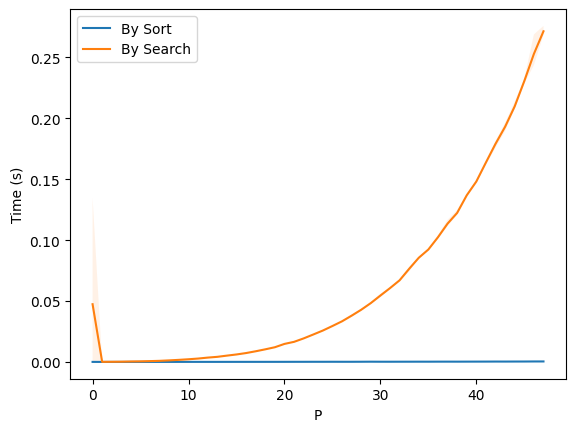

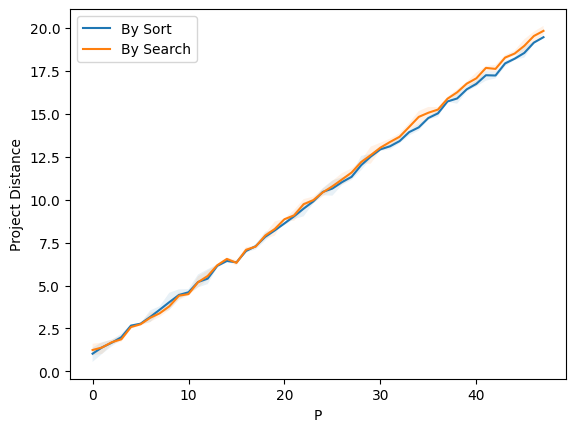

In [2]:
sort_times = []
search_times = []

sort_dists = []
search_dists = []

for n in range(2, 50):
    my_sort_times = []
    my_search_times = []
    my_search_dists = []
    my_sort_dists = []
    for k in range(3):
        w = np.random.uniform(-1, 1, size=(n,n))
        t = time.time()
        w_dag = project_to_dag_search(w)
        my_search_times.append(time.time() - t)
        my_search_dists.append(np.linalg.norm(w_dag - w))
        
        t = time.time()
        w_dag = project_to_dag_torch(w)
        my_sort_times.append(time.time() - t)
        my_sort_dists.append(np.linalg.norm(w_dag - w))
        
    sort_times.append(my_sort_times)
    search_times.append(my_search_times)
    sort_dists.append(my_sort_dists)
    search_dists.append(my_search_dists)
    

def plot_results(results, label):
    results = np.array(results)
    plt.plot(np.mean(results, axis=1), label=label)
    plt.fill_between(range(len(results)),
                     np.percentile(results, 2.5, axis=1),
                     np.percentile(results, 97.5, axis=1),
                    alpha=0.1)
plot_results(sort_times, "By Sort")
plot_results(search_times, "By Search")
plt.xlabel("P")
plt.ylabel("Time (s)")
plt.legend()

plt.figure()
plot_results(sort_dists, "By Sort")
plot_results(search_dists, "By Search")
plt.xlabel("P")
plt.ylabel("Project Distance")
plt.legend()